In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


## Vectorize Input and Output Data

In [0]:
import numpy as np

def vectorize(sequences, num_dimensions=10000):
  results = np.zeros((len(sequences), num_dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize(train_data)
test_data = vectorize(test_data)

In [0]:
def to_one_hot(labels, num_labels=46):
  results = np.zeros((len(labels), num_labels))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)

In [6]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.1)

print('train_data:', train_data.shape)
print('train_labels:', train_labels.shape)
print('validation_data:', validation_data.shape)
print('validation_labels:', validation_labels.shape)

train_data: (8083, 10000)
train_labels: (8083, 46)
validation_data: (899, 10000)
validation_labels: (899, 46)


In [0]:
def fit_and_plot(model):
  
  history = model.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(validation_data, validation_labels))
  history_dict = history.history
  
  loss = history_dict['loss']
  validation_loss = history_dict['val_loss']
  accuracy = history_dict['acc']
  validation_accuracy = history_dict['val_acc']
  
  epochs = range(1, len(loss)+1)
  
  import matplotlib.pyplot as plt
  
  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  
  plt.show()
  
  plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
  plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend()
  
  plt.show()

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 2s 233us/step - loss: 2.5168 - acc: 0.5254 - val_loss: 1.6330 - val_acc: 0.6541
Epoch 2/20
8083/8083 [==============================] - 1s 147us/step - loss: 1.3508 - acc: 0.7094 - val_loss: 1.2488 - val_acc: 0.7353
Epoch 3/20
8083/8083 [==============================] - 1s 130us/step - loss: 1.0149 - acc: 0.7840 - val_loss: 1.1049 - val_acc: 0.7597
Epoch 4/20
8083/8083 [==============================] - 1s 132us/step - loss: 0.8067 - acc: 0.8256 - val_loss: 1.0267 - val_acc: 0.7909
Epoch 5/20
8083/8083 [==============================] - 1s 128us/step - loss: 0.6397 - acc: 0.8634 - val_loss: 0.9745 - val_acc: 0.8042
Epoch 6/20
8083/8083 [==============================] - 1s 155us/step - loss: 0.5159 - acc: 0.8903 - val_loss: 0.9847 - val_acc: 0.7909
Epoch 7/20
8083/8083 [==============================] - 1s 149us/step - loss: 0.4149 - acc: 0.9125 - val_loss: 0.9238 - val_acc: 0.8131
E

8083/8083 [==============================] - 1s 149us/step - loss: 0.2383 - acc: 0.9456 - val_loss: 0.9689 - val_acc: 0.7942
Epoch 11/20
8083/8083 [==============================] - 1s 163us/step - loss: 0.2076 - acc: 0.9487 - val_loss: 0.9714 - val_acc: 0.8053
Epoch 12/20
8083/8083 [==============================] - 1s 140us/step - loss: 0.1819 - acc: 0.9536 - val_loss: 1.0003 - val_acc: 0.8076
Epoch 13/20
8083/8083 [==============================] - 1s 126us/step - loss: 0.1674 - acc: 0.9547 - val_loss: 1.0040 - val_acc: 0.8076
Epoch 14/20
8083/8083 [==============================] - 1s 156us/step - loss: 0.1483 - acc: 0.9566 - val_loss: 1.0603 - val_acc: 0.7942
Epoch 15/20
8083/8083 [==============================] - 1s 138us/step - loss: 0.1410 - acc: 0.9566 - val_loss: 1.0433 - val_acc: 0.7909
Epoch 16/20
8083/8083 [==============================] - 1s 152us/step - loss: 0.1329 - acc: 0.9574 - val_loss: 1.0676 - val_acc: 0.7931
Epoch 17/20
8083/8083 [==============================

8083/8083 [==============================] - 1s 159us/step - loss: 0.1130 - acc: 0.9607 - val_loss: 1.1638 - val_acc: 0.7909
Epoch 20/20
8083/8083 [==============================] - 1s 161us/step - loss: 0.1089 - acc: 0.9584 - val_loss: 1.1563 - val_acc: 0.7931


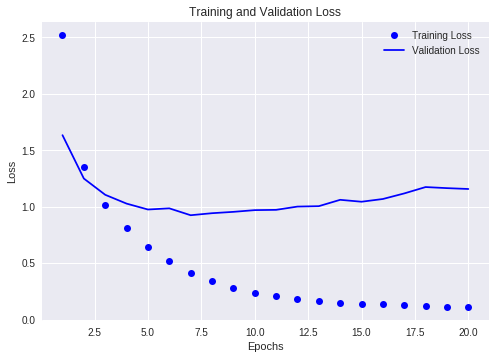

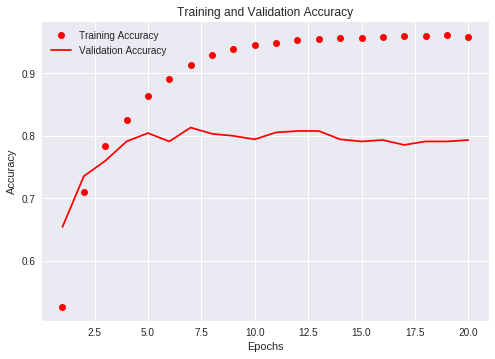

In [10]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

model1.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fit_and_plot(model1)

In [11]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

model1.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(train_data, train_labels, epochs=7, batch_size=512)
results = model1.evaluate(test_data, test_labels)

print(results)

Epoch 1/7
8083/8083 [==============================] - 1s 134us/step - loss: 2.8029 - acc: 0.5118
Epoch 2/7
8083/8083 [==============================] - 1s 79us/step - loss: 1.4861 - acc: 0.6969
Epoch 3/7
8083/8083 [==============================] - 1s 69us/step - loss: 1.0712 - acc: 0.7750
Epoch 4/7
8083/8083 [==============================] - 1s 84us/step - loss: 0.8434 - acc: 0.8263
Epoch 5/7
8083/8083 [==============================] - 1s 72us/step - loss: 0.6786 - acc: 0.8597
Epoch 6/7
8083/8083 [==============================] - 1s 75us/step - loss: 0.5469 - acc: 0.8890
Epoch 7/7
2246/2246 [==============================] - 0s 195us/step
[0.9938772170541548, 0.7894033838464868]


Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 157us/step - loss: 2.1225 - acc: 0.5817 - val_loss: 1.3342 - val_acc: 0.7175
Epoch 2/20
8083/8083 [==============================] - 1s 89us/step - loss: 1.0875 - acc: 0.7621 - val_loss: 1.1047 - val_acc: 0.7775
Epoch 3/20
8083/8083 [==============================] - 1s 79us/step - loss: 0.7728 - acc: 0.8324 - val_loss: 0.9853 - val_acc: 0.7898
Epoch 4/20
8083/8083 [==============================] - 1s 78us/step - loss: 0.5482 - acc: 0.8873 - val_loss: 0.9092 - val_acc: 0.8254
Epoch 5/20
8083/8083 [==============================] - 1s 85us/step - loss: 0.4073 - acc: 0.9146 - val_loss: 0.8911 - val_acc: 0.8187
Epoch 6/20
8083/8083 [==============================] - 1s 81us/step - loss: 0.3107 - acc: 0.9310 - val_loss: 0.9476 - val_acc: 0.8053
Epoch 7/20
8083/8083 [==============================] - 1s 80us/step - loss: 0.2442 - acc: 0.9442 - val_loss: 0.9531 - val_acc: 0.8031
Epoch 8

8083/8083 [==============================] - 1s 84us/step - loss: 0.1342 - acc: 0.9600 - val_loss: 1.0658 - val_acc: 0.8020
Epoch 13/20
8083/8083 [==============================] - 1s 82us/step - loss: 0.1304 - acc: 0.9560 - val_loss: 1.0252 - val_acc: 0.7998
Epoch 14/20
8083/8083 [==============================] - 1s 82us/step - loss: 0.1229 - acc: 0.9586 - val_loss: 1.1505 - val_acc: 0.7742
Epoch 15/20
8083/8083 [==============================] - 1s 80us/step - loss: 0.1147 - acc: 0.9599 - val_loss: 1.0820 - val_acc: 0.8020
Epoch 16/20
8083/8083 [==============================] - 1s 78us/step - loss: 0.1101 - acc: 0.9588 - val_loss: 1.1246 - val_acc: 0.7931
Epoch 17/20
8083/8083 [==============================] - 1s 81us/step - loss: 0.1108 - acc: 0.9588 - val_loss: 1.1559 - val_acc: 0.7831
Epoch 18/20
8083/8083 [==============================] - 1s 86us/step - loss: 0.1104 - acc: 0.9579 - val_loss: 1.1779 - val_acc: 0.7920
Epoch 19/20
8083/8083 [==============================] - 1s 

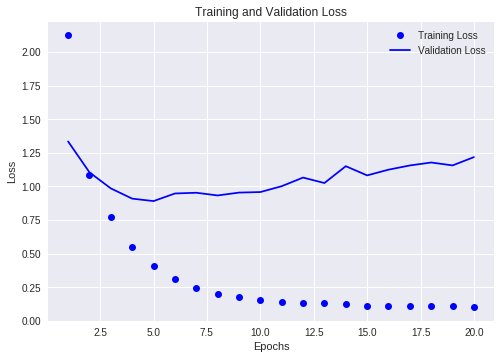

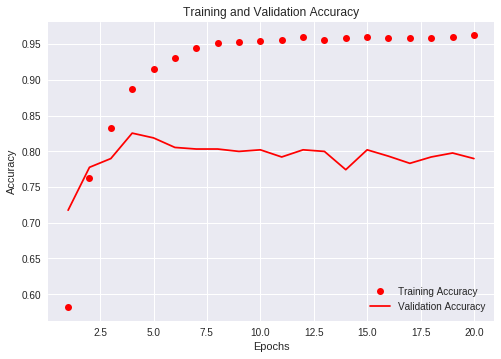

In [13]:
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fit_and_plot(model2)

In [14]:
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(train_data, train_labels, epochs=5)
results = model2.evaluate(test_data, test_labels)

print(results)

Epoch 1/5
8083/8083 [==============================] - 3s 345us/step - loss: 1.3197 - acc: 0.7158
Epoch 2/5
8083/8083 [==============================] - 3s 318us/step - loss: 0.6098 - acc: 0.8664
Epoch 3/5
8083/8083 [==============================] - 3s 314us/step - loss: 0.3604 - acc: 0.9223
Epoch 4/5
8083/8083 [==============================] - 2s 304us/step - loss: 0.2591 - acc: 0.9411
Epoch 5/5
2246/2246 [==============================] - 0s 193us/step
[1.146126849462385, 0.7951914515223549]
